In [1]:
# IMPORT NECESSARY LIBRARIES
import numpy as np
from tensorflow.keras import layers, models, Model, optimizers
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img
import pandas as pd
from sklearn.metrics import confusion_matrix
import sys
import matplotlib.pyplot as plt
import itertools

import warnings
# ignore warnings 
if not sys.warnoptions:
    warnings.simplefilter("ignore")
warnings.filterwarnings("ignore", category=DeprecationWarning)
import keras
from keras.models import Sequential, Model, model_from_json
from keras.layers import Conv1D, MaxPooling2D, AveragePooling1D
from keras.layers import Input, Flatten, Dropout, Activation, BatchNormalization
from keras.layers import Dense, Embedding, LSTM
from keras.regularizers import l2
from keras.constraints import max_norm
from keras.callbacks import EarlyStopping, ModelCheckpoint
import cv2
from sklearn.utils import shuffle
from tensorflow.python.keras import layers, models, Model, optimizers
from tensorflow.keras import regularizers
from tensorflow.keras import layers, models, Model, optimizers
from keras.utils.np_utils import to_categorical
from random import randint
from sklearn.preprocessing import LabelEncoder
from keras.callbacks import ReduceLROnPlateau
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from matplotlib import pyplot



# Labels

In [2]:
import glob
angry = glob.glob('D:/thesis_codes/7_Spectrogram_2DCNN/OUT_RAV/specs/output/train/angry/*.*')
calm = glob.glob('D:/thesis_codes/7_Spectrogram_2DCNN/OUT_RAV/specs/output/train/calm/*.*')
disgust = glob.glob('D:/thesis_codes/7_Spectrogram_2DCNN/OUT_RAV/specs/output/train/disgust/*.*')
fearful = glob.glob('D:/thesis_codes/7_Spectrogram_2DCNN/OUT_RAV/specs/output/train/fear/*.*')
happy = glob.glob('D:/thesis_codes/7_Spectrogram_2DCNN/OUT_RAV/specs/output/train/happy/*.*')
neutral =glob.glob('D:/thesis_codes/7_Spectrogram_2DCNN/OUT_RAV/specs/output/train/neutral/*.*')
sad =glob.glob('D:/thesis_codes/7_Spectrogram_2DCNN/OUT_RAV/specs/output/train/sad/*.*')
surprised = glob.glob('D:/thesis_codes/7_Spectrogram_2DCNN/OUT_RAV/specs/output/train/surprise/*.*')

In [3]:
train_data = []
train_labels = []

for i in angry:   
    image=tf.keras.preprocessing.image.load_img(i, color_mode='rgb', 
    target_size= (224,224))
    image=np.array(image)
    train_data.append(image)
    train_labels.append('Angry')
for i in calm:   
    image=tf.keras.preprocessing.image.load_img(i, color_mode='rgb', 
    target_size= (224,224))
    image=np.array(image)
    train_data.append(image)
    train_labels.append('Calm')
for i in disgust:   
    image=tf.keras.preprocessing.image.load_img(i, color_mode='rgb', 
    target_size= (224,224))
    image=np.array(image)
    train_data.append(image)
    train_labels.append('Disgust')
for i in fearful:   
    image=tf.keras.preprocessing.image.load_img(i, color_mode='rgb', 
    target_size= (224,224))
    image=np.array(image)
    train_data.append(image)
    train_labels.append('Fearful')
for i in happy:   
    image=tf.keras.preprocessing.image.load_img(i, color_mode='rgb', 
    target_size= (224,224))
    image=np.array(image)
    train_data.append(image)
    train_labels.append('Happy')
for i in neutral:   
    image=tf.keras.preprocessing.image.load_img(i, color_mode='rgb', 
    target_size= (224,224))
    image=np.array(image)
    train_data.append(image)
    train_labels.append('Neutral')
for i in sad:   
    image=tf.keras.preprocessing.image.load_img(i, color_mode='rgb', 
    target_size= (224,224))
    image=np.array(image)
    train_data.append(image)
    train_labels.append('Sad')
for i in surprised:   
    image=tf.keras.preprocessing.image.load_img(i, color_mode='rgb', 
    target_size= (224,224))
    image=np.array(image)
    train_data.append(image)
    train_labels.append('Surprised')

train_data = np.array(train_data)
train_labels = np.array(train_labels)


In [4]:
X_train=train_data
y_train=train_labels

In [5]:
import glob
import glob
angry = glob.glob('D:/thesis_codes/7_Spectrogram_2DCNN/OUT_RAV/specs/output/val/angry/*.*')
calm = glob.glob('D:/thesis_codes/7_Spectrogram_2DCNN/OUT_RAV/specs/output/val/calm/*.*')
disgust = glob.glob('D:/thesis_codes/7_Spectrogram_2DCNN/OUT_RAV/specs/output/val/disgust/*.*')
fearful = glob.glob('D:/thesis_codes/7_Spectrogram_2DCNN/OUT_RAV/specs/output/val/fear/*.*')
happy = glob.glob('D:/thesis_codes/7_Spectrogram_2DCNN/OUT_RAV/specs/output/val/happy/*.*')
neutral =glob.glob('D:/thesis_codes/7_Spectrogram_2DCNN/OUT_RAV/specs/output/val/neutral/*.*')
sad =glob.glob('D:/thesis_codes/7_Spectrogram_2DCNN/OUT_RAV/specs/output/val/sad/*.*')
surprised = glob.glob('D:/thesis_codes/7_Spectrogram_2DCNN/OUT_RAV/specs/output/val/surprise/*.*')

In [6]:
test_data = []
test_labels = []

for i in angry:   
    image=tf.keras.preprocessing.image.load_img(i, color_mode='rgb', 
    target_size= (224,224))
    image=np.array(image)
    test_data.append(image)
    test_labels.append('Angry')
for i in calm:   
    image=tf.keras.preprocessing.image.load_img(i, color_mode='rgb', 
    target_size= (224,224))
    image=np.array(image)
    test_data.append(image)
    test_labels.append('Calm')
for i in disgust:   
    image=tf.keras.preprocessing.image.load_img(i, color_mode='rgb', 
    target_size= (224,224))
    image=np.array(image)
    test_data.append(image)
    test_labels.append('Disgust')
for i in fearful:   
    image=tf.keras.preprocessing.image.load_img(i, color_mode='rgb', 
    target_size= (224,224))
    image=np.array(image)
    test_data.append(image)
    test_labels.append('Fearful')
for i in happy:   
    image=tf.keras.preprocessing.image.load_img(i, color_mode='rgb', 
    target_size= (224,224))
    image=np.array(image)
    test_data.append(image)
    test_labels.append('Happy')
for i in neutral:   
    image=tf.keras.preprocessing.image.load_img(i, color_mode='rgb', 
    target_size= (224,224))
    image=np.array(image)
    test_data.append(image)
    test_labels.append('Neutral')
for i in sad:   
    image=tf.keras.preprocessing.image.load_img(i, color_mode='rgb', 
    target_size= (224,224))
    image=np.array(image)
    test_data.append(image)
    test_labels.append('Sad')
for i in surprised:   
    image=tf.keras.preprocessing.image.load_img(i, color_mode='rgb', 
    target_size= (224,224))
    image=np.array(image)
    test_data.append(image)
    test_labels.append('Surprised')

test_data = np.array(test_data)
test_labels = np.array(test_labels)

In [7]:
X_test=test_data
y_test=test_labels

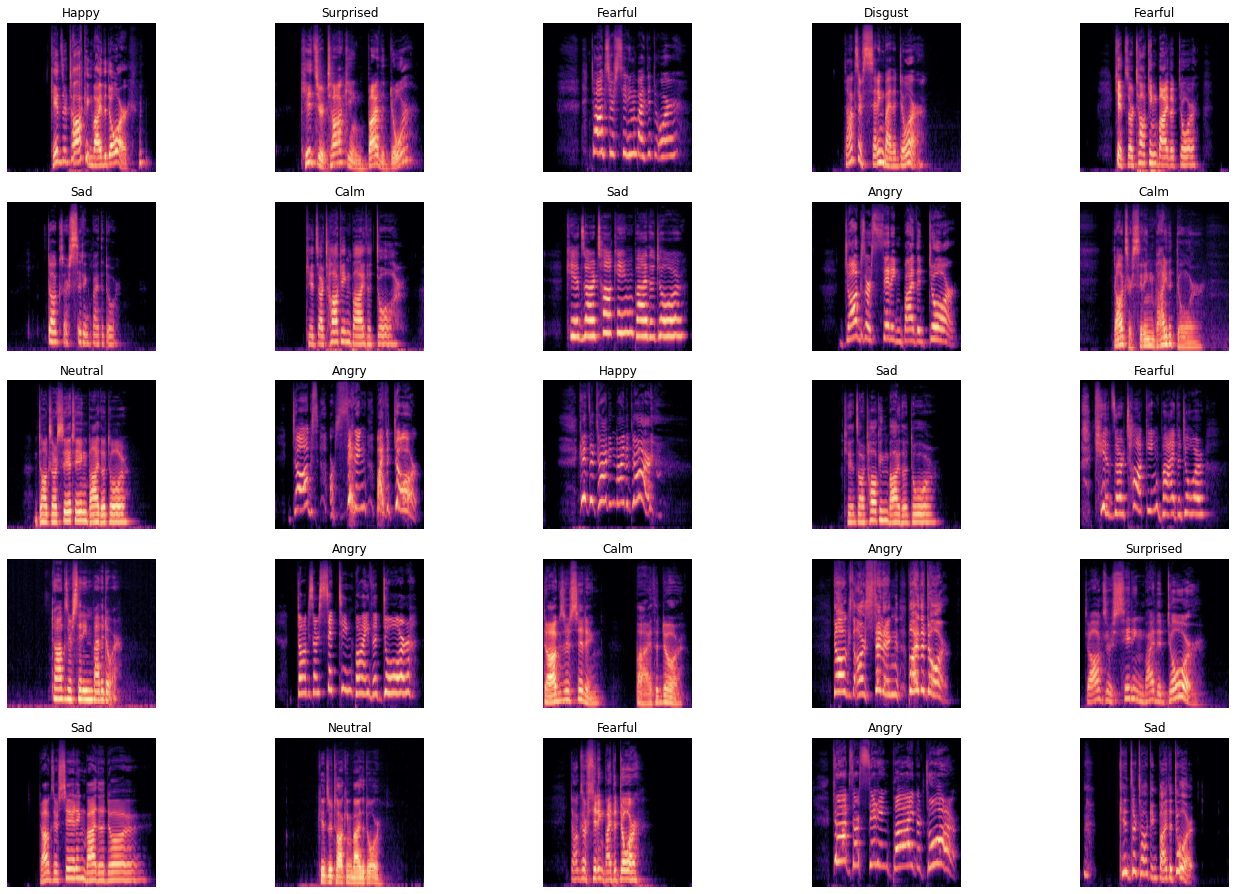

In [8]:
def get_classlabel(class_code):
    labels = {'Angry':'Angry', 'Calm':'Calm', 'Disgust':'Disgust', 'Fearful':'Fearful', 'Happy':'Happy', 'Neutral':'Neutral','Sad':'Sad','Surprised':'Surprised'}
    
    return labels[class_code]

f,ax = plt.subplots(5,5) 
f.subplots_adjust(0,0,3,3)
for i in range(0,5,1):
    for j in range(0,5,1):
        rnd_number = randint(0,len(train_data))
        ax[i,j].imshow(train_data[rnd_number])
        ax[i,j].set_title(get_classlabel(train_labels[rnd_number]))
        ax[i,j].axis('off')

In [9]:

# Check shapes of training and testing sets
print('X_train has a shape of {}, y_train has a shape of {}'.format(X_train.shape,y_train.shape))
print('X_test has a shape of {}, y_test has a shape of {}'.format(X_test.shape,y_test.shape))

X_train has a shape of (1956, 224, 224, 3), y_train has a shape of (1956,)
X_test has a shape of (496, 224, 224, 3), y_test has a shape of (496,)


In [10]:
# Finally, we normalize pixels in X_train and X_test to the range [0,1] for faster convergence
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

In [22]:
from tensorflow.keras.utils import to_categorical

lb = LabelEncoder()

y_train = tf.keras.utils.to_categorical(lb.fit_transform(y_train))
y_test = tf.keras.utils.to_categorical(lb.fit_transform(y_test))


# VGG16

In [24]:
from tensorflow.keras.applications.vgg16 import VGG16

vgg_model = VGG16(weights='imagenet',
                  include_top=False,
                  input_shape=(224, 224, 3))

In [25]:
for layer in vgg_model.layers:
    layer.trainable = False

In [26]:
x = vgg_model.output
x = Flatten()(x) # Flatten dimensions to for use in FC layers
x = Dense(512, activation='relu')(x)
x = Dropout(0.5)(x) # Dropout layer to reduce overfitting
x = Dense(256, activation='relu')(x)
x = Dense(8, activation='softmax')(x) # Softmax for multiclass
transfer_model = Model(inputs=vgg_model.input, outputs=x)

In [27]:
# Make sure you have frozen the correct layers
for i, layer in enumerate(vgg_model.layers):
    print(i, layer.name, layer.trainable)

0 input_1 False
1 block1_conv1 False
2 block1_conv2 False
3 block1_pool False
4 block2_conv1 False
5 block2_conv2 False
6 block2_pool False
7 block3_conv1 False
8 block3_conv2 False
9 block3_conv3 False
10 block3_pool False
11 block4_conv1 False
12 block4_conv2 False
13 block4_conv3 False
14 block4_pool False
15 block5_conv1 False
16 block5_conv2 False
17 block5_conv3 False
18 block5_pool False


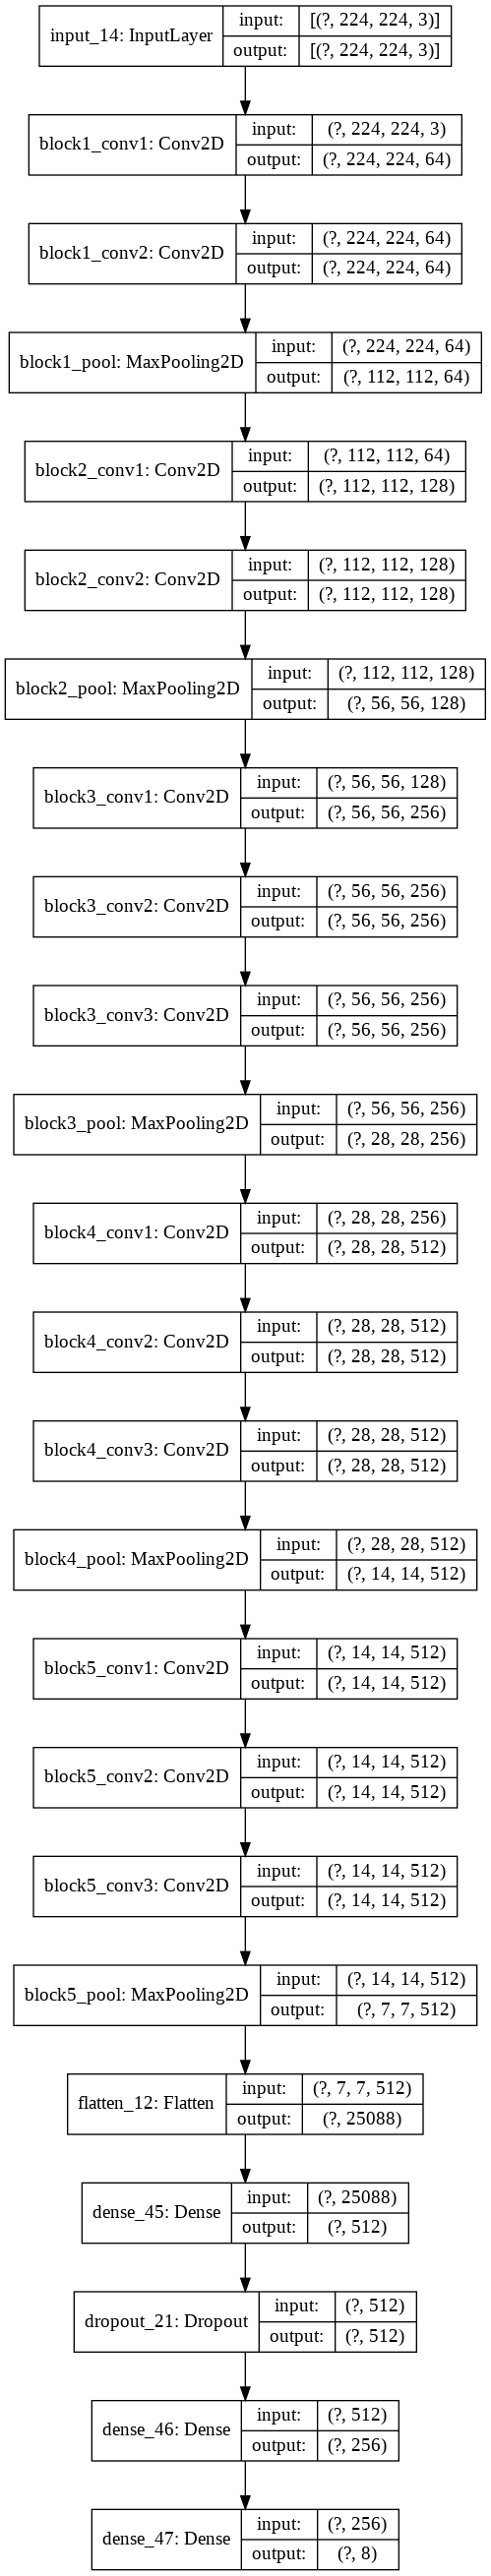

In [ ]:
keras.utils.plot_model(transfer_model, show_shapes=True)

In [28]:

from tensorflow.keras import layers, models, Model, optimizers

learning_rate= 5e-5
transfer_model.compile(loss="categorical_crossentropy", optimizer=optimizers.Adam(lr=learning_rate), metrics=["accuracy"])

In [29]:

# Here we use testing set as validation set
history = transfer_model.fit(X_train, y_train, batch_size = 8, epochs=50, validation_data=(X_test,y_test))

Epoch 1/50
245/245 [==============================] - 52s 183ms/step - loss: 1.9865 - accuracy: 0.2132 - val_loss: 1.7869 - val_accuracy: 0.2883
Epoch 2/50
245/245 [==============================] - 43s 177ms/step - loss: 1.7275 - accuracy: 0.3287 - val_loss: 1.5579 - val_accuracy: 0.4234
Epoch 3/50
245/245 [==============================] - 44s 178ms/step - loss: 1.5524 - accuracy: 0.4151 - val_loss: 1.4700 - val_accuracy: 0.4496
Epoch 4/50
245/245 [==============================] - 44s 178ms/step - loss: 1.4497 - accuracy: 0.4504 - val_loss: 1.3537 - val_accuracy: 0.5081
Epoch 5/50
245/245 [==============================] - 44s 179ms/step - loss: 1.3104 - accuracy: 0.4964 - val_loss: 1.2912 - val_accuracy: 0.5282
Epoch 6/50
245/245 [==============================] - 44s 179ms/step - loss: 1.2437 - accuracy: 0.5332 - val_loss: 1.2382 - val_accuracy: 0.5444
Epoch 7/50
245/245 [==============================] - 44s 180ms/step - loss: 1.1604 - accuracy: 0.5706 - val_loss: 1.2576 - val_ac

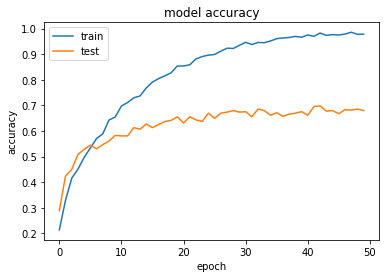

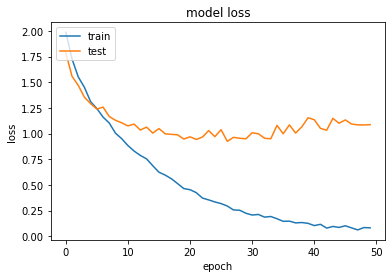

In [30]:
        # PRINT MODEL HISTORY OF ACCURACY AND LOSS OVER EPOCHS
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
# plt.savefig('Augmented_Model_Accuracy.png')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
# plt.savefig('Augmented_Model_Loss.png')
plt.show()

In [31]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.figure(figsize = (5,5))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=90)
    plt.yticks(tick_marks, classes)
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

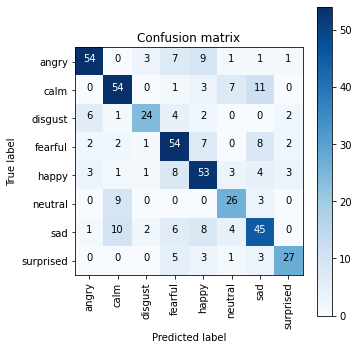

In [32]:
y_pred = transfer_model.predict(X_test)
Y_pred_classes = np.argmax(y_pred,axis=1) 
Y_true = np.argmax(y_test,axis=1)
dict_characters = {0: 'angry', 1: 'calm', 2: 'disgust', 3: 'fearful', 4: 'happy', 5: 'neutral', 6: 'sad', 7: 'surprised'}
confusion_mtx = confusion_matrix(Y_true, Y_pred_classes) 
plot_confusion_matrix(confusion_mtx, classes = list(dict_characters.values())) 
plt.show()

In [33]:
from sklearn.metrics import classification_report
print(classification_report(Y_true, Y_pred_classes, target_names = ['angry','calm','disgust','fearful','happy','neutral','sad','surprised']))

              precision    recall  f1-score   support

       angry       0.82      0.71      0.76        76
        calm       0.70      0.71      0.71        76
     disgust       0.77      0.62      0.69        39
     fearful       0.64      0.71      0.67        76
       happy       0.62      0.70      0.66        76
     neutral       0.62      0.68      0.65        38
         sad       0.60      0.59      0.60        76
   surprised       0.77      0.69      0.73        39

    accuracy                           0.68       496
   macro avg       0.69      0.68      0.68       496
weighted avg       0.69      0.68      0.68       496



# VGG16 Fine-Tuning

In [24]:
from tensorflow.keras.applications.vgg16 import VGG16

vgg_model = VGG16(weights='imagenet',
                  include_top=False,
                  input_shape=(224, 224, 3))

In [25]:
for layer in vgg_model.layers[:15]:
    layer.trainable = False

In [26]:
# Make sure you have frozen the correct layers
for i, layer in enumerate(vgg_model.layers):
    print(i, layer.name, layer.trainable)

0 input_1 False
1 block1_conv1 False
2 block1_conv2 False
3 block1_pool False
4 block2_conv1 False
5 block2_conv2 False
6 block2_pool False
7 block3_conv1 False
8 block3_conv2 False
9 block3_conv3 False
10 block3_pool False
11 block4_conv1 False
12 block4_conv2 False
13 block4_conv3 False
14 block4_pool False
15 block5_conv1 True
16 block5_conv2 True
17 block5_conv3 True
18 block5_pool True


In [27]:
x = vgg_model.output
x = Flatten()(x) # Flatten dimensions to for use in FC layers
x = Dense(512, activation='relu')(x)
x = Dropout(0.5)(x) # Dropout layer to reduce overfitting
x = Dense(256, activation='relu')(x)
x = Dense(8, activation='softmax')(x) # Softmax for multiclass
transfer_model = Model(inputs=vgg_model.input, outputs=x)

In [28]:
lr_reduce = ReduceLROnPlateau(monitor='val_accuracy', 
                              patience = 2, 
                              verbose=1,
                              factor=0.3, 
                              min_lr=0.000001)

checkpoint = ModelCheckpoint('finetune.h15', monitor= 'val_accuracy', mode= 'max', save_best_only = True, verbose= 1)


In [29]:

learning_rate= 5e-5
transfer_model.compile(loss="categorical_crossentropy", optimizer=optimizers.Adam(lr=learning_rate), metrics=["accuracy"])

In [ ]:
# Here we use testing set as validation set
history = transfer_model.fit(X_train, y_train, batch_size = 8, epochs=50, validation_data=(X_test,y_test), callbacks=[lr_reduce,checkpoint])

Epoch 1/50
1152/1152 [==============================] - ETA: 0s - loss: 1.9581 - accuracy: 0.2161WARNING:tensorflow:Callbacks method `on_test_batch_end` is slow compared to the batch time (batch time: 0.0024s vs `on_test_batch_end` time: 0.0055s). Check your callbacks.

Epoch 00001: val_accuracy improved from -inf to 0.32639, saving model to finetune.h15
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
INFO:tensorflow:Assets written to: finetune.h15/assets
1152/1152 [==============================] - 26s 22ms/step - loss: 1.9581 - accuracy: 0.2161 - val_loss: 1.6475 - val_accuracy: 0.3264
Epoch 2/50
1151/1152 [============================>.] - ETA: 0s - loss: 1.5666 - accuracy: 0.4118
Epoch 00002: val_accuracy improved from 0.32639 to 0.50694, saving model to finetune.h15
INFO:tensorflow:Assets written t

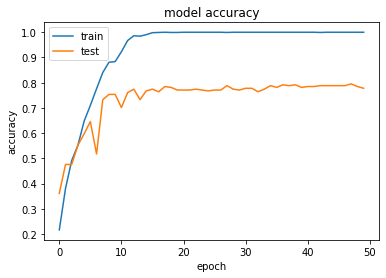

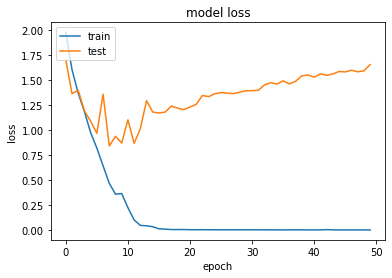

In [ ]:
        # PRINT MODEL HISTORY OF ACCURACY AND LOSS OVER EPOCHS
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
# plt.savefig('Augmented_Model_Accuracy.png')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
# plt.savefig('Augmented_Model_Loss.png')
plt.show()

In [45]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.figure(figsize = (5,5))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=90)
    plt.yticks(tick_marks, classes)
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

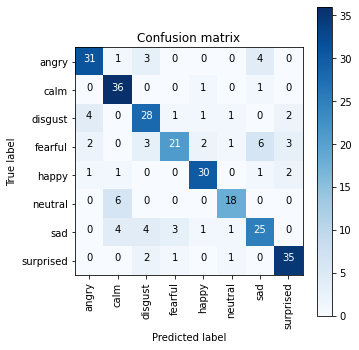

In [ ]:
y_pred = transfer_model.predict(X_test)
Y_pred_classes = np.argmax(y_pred,axis=1) 
Y_true = np.argmax(y_test,axis=1)
dict_characters = {0: 'angry', 1: 'calm', 2: 'disgust', 3: 'fearful', 4: 'happy', 5: 'neutral', 6: 'sad', 7: 'surprised'}
confusion_mtx = confusion_matrix(Y_true, Y_pred_classes) 
plot_confusion_matrix(confusion_mtx, classes = list(dict_characters.values())) 
plt.show()

In [ ]:
print(classification_report(Y_true, Y_pred_classes, target_names = ['angry','calm','disgust','fearful','happy','neutral','sad','surprised']))

              precision    recall  f1-score   support

       angry       0.82      0.79      0.81        39
        calm       0.75      0.95      0.84        38
     disgust       0.70      0.76      0.73        37
     fearful       0.81      0.55      0.66        38
       happy       0.86      0.86      0.86        35
     neutral       0.82      0.75      0.78        24
         sad       0.68      0.66      0.67        38
   surprised       0.83      0.90      0.86        39

    accuracy                           0.78       288
   macro avg       0.78      0.78      0.77       288
weighted avg       0.78      0.78      0.77       288



# VGG16 Image Augmentation

In [30]:
from tensorflow.keras.applications.vgg16 import VGG16

vgg_model = VGG16(weights='imagenet',
                  include_top=False,
                  input_shape=(224, 224, 3))

In [31]:
for layer in vgg_model.layers:
    layer.trainable = False

In [32]:
x = vgg_model.output
x = Flatten()(x) # Flatten dimensions to for use in FC layers
x = Dense(512, activation='relu')(x)
x = Dropout(0.5)(x) # Dropout layer to reduce overfitting
x = Dense(256, activation='relu')(x)
x = Dense(8, activation='softmax')(x) # Softmax for multiclass
transfer_model = Model(inputs=vgg_model.input, outputs=x)

In [33]:
for i, layer in enumerate(transfer_model.layers):
    print(i, layer.name, layer.trainable)

0 input_2 False
1 block1_conv1 False
2 block1_conv2 False
3 block1_pool False
4 block2_conv1 False
5 block2_conv2 False
6 block2_pool False
7 block3_conv1 False
8 block3_conv2 False
9 block3_conv3 False
10 block3_pool False
11 block4_conv1 False
12 block4_conv2 False
13 block4_conv3 False
14 block4_pool False
15 block5_conv1 False
16 block5_conv2 False
17 block5_conv3 False
18 block5_pool False
19 flatten_1 True
20 dense_3 True
21 dropout_1 True
22 dense_4 True
23 dense_5 True


In [ ]:
# reduce learning rate when val_accuracy has stopped improving
lr_reduce = ReduceLROnPlateau(monitor='val_accuracy', 
                              patience = 2, 
                              verbose=1,
                              factor=0.95, 
                              min_lr=0.000001)

# stop training when val_accuracy has stopped improving
early_stop = EarlyStopping(monitor='val_accuracy',
                                       patience=8,
                                       verbose=1,
                                       mode='max')

checkpoint = ModelCheckpoint('iaB6.h15', monitor= 'val_accuracy', mode= 'max', save_best_only = True, verbose= 1)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Labels: ['Angry', 'Angry', 'Angry', 'Angry', 'Angry']


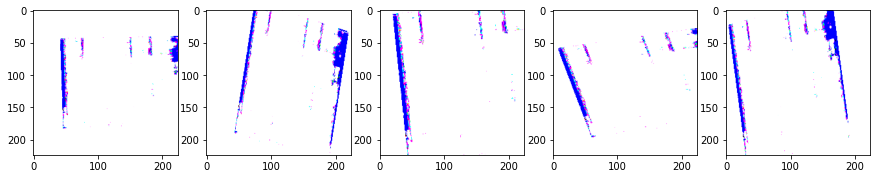

In [ ]:
img_id=3
img_generator = train_datagen.flow(train_data[img_id:img_id+1], train_labels[img_id:img_id+1],
                                   batch_size=1)
angry_img = [next(img_generator) for i in range(0,5)]
fig, ax = plt.subplots(1,5, figsize=(15, 6))
print('Labels:', [item[1][0] for item in angry_img])
l = [ax[i].imshow(angry_img[i][0][0]) for i in range(0,5)]

In [ ]:
train_datagen = ImageDataGenerator( 
                                  zoom_range=0.3,
                                   rotation_range=20,
                                   width_shift_range=0.15)
                                  #  height_shift_range=0.3, 
                                  #  horizontal_flip = True,
                                  #  vertical_flip=True,
                                  #  shear_range=0.3,
                                  #  fill_mode="nearest")                                


train_generator = train_datagen.flow(X_train,
                                     y_train,
                                     batch_size=1)


learning_rate= 5e-5
transfer_model.compile(loss="categorical_crossentropy", optimizer=keras.optimizers.Adam(lr=learning_rate), metrics=["accuracy"])

history = transfer_model.fit_generator(train_generator,
                    # steps_per_epoch=300,
                    validation_data=(X_test,y_test),
                    # validation_steps=50,
                    epochs=80,
                    shuffle=True,
                    callbacks=[lr_reduce,checkpoint],
                    verbose=1)


/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/80
1152/1152 [==============================] - 19s 16ms/step - loss: 2.2775 - accuracy: 0.1423 - val_loss: 2.0248 - val_accuracy: 0.1910

Epoch 00001: val_accuracy improved from -inf to 0.19097, saving model to iaB6.h15
INFO:tensorflow:Assets written to: iaB6.h15/assets
Epoch 2/80
1152/1152 [==============================] - 19s 16ms/step - loss: 2.0678 - accuracy: 0.1702 - val_loss: 1.9279 - val_accuracy: 0.3368

Epoch 00002: val_accuracy improved from 0.19097 to 0.33681, saving model to iaB6.h15
INFO:tensorflow:Assets written to: iaB6.h15/assets
Epoch 3/80
1152/1152 [==============================] - 18s 16ms/step - loss: 2.0066 - accuracy: 0.1845 - val_loss: 1.8628 - val_accuracy: 0.2639

Epoch 00003: val_accuracy did not improve from 0.33681
Epoch 4/80
1152/1152 [==============================] - 18s 16ms/step - loss: 1.9679 - accuracy: 0.1948 - val_loss: 1.8519 - val_accuracy: 0.2604

Epoch 00004: ReduceLROnPlateau reducing learning rate to 4.749999880004907e-05.

Epoch 0

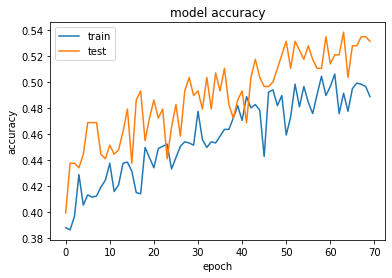

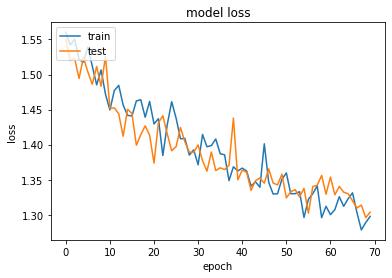

In [ ]:
        # PRINT MODEL HISTORY OF ACCURACY AND LOSS OVER EPOCHS
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
# plt.savefig('Augmented_Model_Accuracy.png')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
# plt.savefig('Augmented_Model_Loss.png')
plt.show()

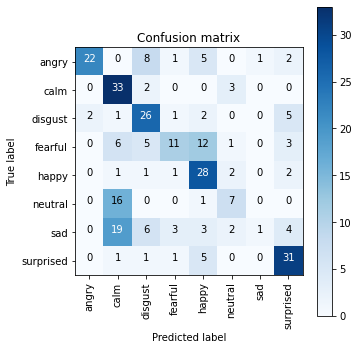

In [ ]:
y_pred = transfer_model.predict(X_test)
Y_pred_classes = np.argmax(y_pred,axis=1) 
Y_true = np.argmax(y_test,axis=1)
dict_characters = {0: 'angry', 1: 'calm', 2: 'disgust', 3: 'fearful', 4: 'happy', 5: 'neutral', 6: 'sad', 7: 'surprised'}
confusion_mtx = confusion_matrix(Y_true, Y_pred_classes) 
plot_confusion_matrix(confusion_mtx, classes = list(dict_characters.values())) 
plt.show()

In [ ]:
print(classification_report(Y_true, Y_pred_classes, target_names = ['angry','calm','disgust','fearful','happy','neutral','sad','surprised']))

              precision    recall  f1-score   support

       angry       0.92      0.56      0.70        39
        calm       0.43      0.87      0.57        38
     disgust       0.53      0.70      0.60        37
     fearful       0.61      0.29      0.39        38
       happy       0.50      0.80      0.62        35
     neutral       0.47      0.29      0.36        24
         sad       0.50      0.03      0.05        38
   surprised       0.66      0.79      0.72        39

    accuracy                           0.55       288
   macro avg       0.58      0.54      0.50       288
weighted avg       0.58      0.55      0.51       288



# VGG16 Fine Tuning With Image Augmentation

In [34]:
from tensorflow.keras.applications.vgg16 import VGG16

vgg_model = VGG16(weights='imagenet',
                  include_top=False,
                  input_shape=(224, 224, 3))

In [35]:
for layer in vgg_model.layers[:15]:
    layer.trainable = False

In [36]:
x = vgg_model.output
x = Flatten()(x) # Flatten dimensions to for use in FC layers
x = Dense(512, activation='relu')(x)
x = Dropout(0.5)(x) # Dropout layer to reduce overfitting
x = Dense(256, activation='relu')(x)
x = Dense(8, activation='softmax')(x) # Softmax for multiclass
transfer_model = Model(inputs=vgg_model.input, outputs=x)

In [37]:
for i, layer in enumerate(transfer_model.layers):
    print(i, layer.name, layer.trainable)

0 input_3 False
1 block1_conv1 False
2 block1_conv2 False
3 block1_pool False
4 block2_conv1 False
5 block2_conv2 False
6 block2_pool False
7 block3_conv1 False
8 block3_conv2 False
9 block3_conv3 False
10 block3_pool False
11 block4_conv1 False
12 block4_conv2 False
13 block4_conv3 False
14 block4_pool False
15 block5_conv1 True
16 block5_conv2 True
17 block5_conv3 True
18 block5_pool True
19 flatten_2 True
20 dense_6 True
21 dropout_2 True
22 dense_7 True
23 dense_8 True


In [38]:
# reduce learning rate when val_accuracy has stopped improving
lr_reduce = ReduceLROnPlateau(monitor='val_accuracy', 
                              patience = 2, 
                              verbose=1,
                              factor=0.95, 
                              min_lr=0.000001)

checkpoint = ModelCheckpoint('ftzq.h15', monitor= 'val_accuracy', mode= 'max', save_best_only = True, verbose= 1)


In [39]:
train_datagen = ImageDataGenerator(
                                    zoom_range=0.3,
                                   rotation_range=20,
                                   width_shift_range=0.15)
#                                   #  height_shift_range=0.4,
#                                   #  shear_range=0.3,
#                                   #  horizontal_flip=True, 
#                                   #  fill_mode='nearest')

train_generator = train_datagen.flow(X_train,
                                     y_train,
                                     batch_size=1)

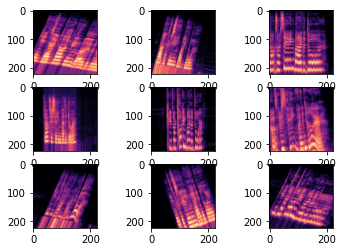

In [40]:
img_rows, img_cols = 224, 224

for x, y in train_datagen.flow(X_train, y_train, batch_size=9):
    # Show the first 9 images
    for i in range(0, 9):
        pyplot.subplot(330 + 1 + i)
        pyplot.imshow(x[i].reshape(img_rows, img_cols, 3))
    # show the plot
    pyplot.show()
    break

In [41]:
from tensorflow.keras import layers, models, Model, optimizers

learning_rate= 5e-5
transfer_model.compile(loss="categorical_crossentropy", optimizer=optimizers.Adam(lr=learning_rate), metrics=["accuracy"])

history = transfer_model.fit_generator(train_generator,
                    # steps_per_epoch=10,
                    validation_data=(X_test,y_test),
                    # validation_steps=20,
                    epochs=80,
                    callbacks=[lr_reduce,checkpoint])
                    # shuffle=True)

Epoch 1/80
1956/1956 [==============================] - ETA: 0s - loss: 2.0077 - accuracy: 0.1902
Epoch 1: val_accuracy improved from -inf to 0.24194, saving model to ftzq.h15
INFO:tensorflow:Assets written to: ftzq.h15\assets
1956/1956 [==============================] - 128s 62ms/step - loss: 2.0077 - accuracy: 0.1902 - val_loss: 1.8599 - val_accuracy: 0.2419 - lr: 5.0000e-05
Epoch 2/80
1956/1956 [==============================] - ETA: 0s - loss: 1.7588 - accuracy: 0.3093
Epoch 2: val_accuracy improved from 0.24194 to 0.37500, saving model to ftzq.h15
INFO:tensorflow:Assets written to: ftzq.h15\assets
1956/1956 [==============================] - 118s 60ms/step - loss: 1.7588 - accuracy: 0.3093 - val_loss: 1.5633 - val_accuracy: 0.3750 - lr: 5.0000e-05
Epoch 3/80
1956/1956 [==============================] - ETA: 0s - loss: 1.6088 - accuracy: 0.3676
Epoch 3: val_accuracy improved from 0.37500 to 0.44153, saving model to ftzq.h15
INFO:tensorflow:Assets written to: ftzq.h15\assets
1956/19

Epoch 24/80
1956/1956 [==============================] - ETA: 0s - loss: 0.5853 - accuracy: 0.7832
Epoch 24: val_accuracy improved from 0.65927 to 0.67540, saving model to ftzq.h15
INFO:tensorflow:Assets written to: ftzq.h15\assets
1956/1956 [==============================] - 117s 60ms/step - loss: 0.5853 - accuracy: 0.7832 - val_loss: 0.9810 - val_accuracy: 0.6754 - lr: 4.2869e-05
Epoch 25/80
1956/1956 [==============================] - ETA: 0s - loss: 0.5796 - accuracy: 0.7981
Epoch 25: val_accuracy did not improve from 0.67540
1956/1956 [==============================] - 112s 57ms/step - loss: 0.5796 - accuracy: 0.7981 - val_loss: 1.1529 - val_accuracy: 0.5867 - lr: 4.2869e-05
Epoch 26/80
1956/1956 [==============================] - ETA: 0s - loss: 0.5198 - accuracy: 0.8113
Epoch 26: ReduceLROnPlateau reducing learning rate to 4.072531155543402e-05.

Epoch 26: val_accuracy did not improve from 0.67540
1956/1956 [==============================] - 112s 57ms/step - loss: 0.5198 - accur


Epoch 47: val_accuracy did not improve from 0.74597
1956/1956 [==============================] - 110s 56ms/step - loss: 0.2053 - accuracy: 0.9340 - val_loss: 1.2407 - val_accuracy: 0.7419 - lr: 2.8440e-05
Epoch 48/80
1956/1956 [==============================] - ETA: 0s - loss: 0.1836 - accuracy: 0.9381
Epoch 48: val_accuracy did not improve from 0.74597
1956/1956 [==============================] - 110s 56ms/step - loss: 0.1836 - accuracy: 0.9381 - val_loss: 1.4031 - val_accuracy: 0.7117 - lr: 2.7018e-05
Epoch 49/80
1956/1956 [==============================] - ETA: 0s - loss: 0.1857 - accuracy: 0.9340
Epoch 49: val_accuracy improved from 0.74597 to 0.75605, saving model to ftzq.h15
INFO:tensorflow:Assets written to: ftzq.h15\assets
1956/1956 [==============================] - 115s 59ms/step - loss: 0.1857 - accuracy: 0.9340 - val_loss: 0.9890 - val_accuracy: 0.7560 - lr: 2.7018e-05
Epoch 50/80
1956/1956 [==============================] - ETA: 0s - loss: 0.1622 - accuracy: 0.9458
Epoch 

1956/1956 [==============================] - ETA: 0s - loss: 0.0777 - accuracy: 0.9755
Epoch 71: val_accuracy did not improve from 0.76815
1956/1956 [==============================] - 111s 57ms/step - loss: 0.0777 - accuracy: 0.9755 - val_loss: 1.5444 - val_accuracy: 0.7440 - lr: 1.7028e-05
Epoch 72/80
1956/1956 [==============================] - ETA: 0s - loss: 0.0859 - accuracy: 0.9714
Epoch 72: val_accuracy improved from 0.76815 to 0.77218, saving model to ftzq.h15
INFO:tensorflow:Assets written to: ftzq.h15\assets
1956/1956 [==============================] - 116s 59ms/step - loss: 0.0859 - accuracy: 0.9714 - val_loss: 1.3344 - val_accuracy: 0.7722 - lr: 1.7028e-05
Epoch 73/80
1956/1956 [==============================] - ETA: 0s - loss: 0.0883 - accuracy: 0.9739
Epoch 73: val_accuracy did not improve from 0.77218
1956/1956 [==============================] - 111s 57ms/step - loss: 0.0883 - accuracy: 0.9739 - val_loss: 1.2821 - val_accuracy: 0.7500 - lr: 1.7028e-05
Epoch 74/80
1956/19

In [42]:
transfer_model.save_weights("vgg16fineaugment_weights.h5")
transfer_model.save('vgg16fineaugment.h5')
print("Saved model to disk")

Saved model to disk


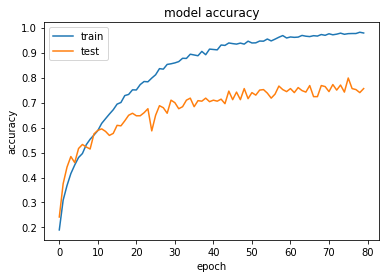

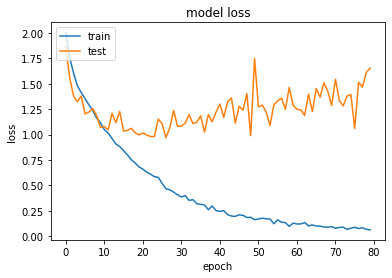

In [43]:
        # PRINT MODEL HISTORY OF ACCURACY AND LOSS OVER EPOCHS
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')

plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
# plt.savefig('Augmented_Model_Accuracy.png')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
# plt.savefig('Augmented_Model_Loss.png')
plt.show()

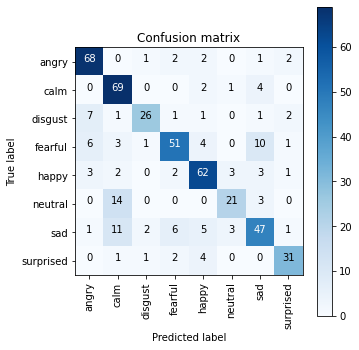

In [46]:
y_pred = transfer_model.predict(X_test)
Y_pred_classes = np.argmax(y_pred,axis=1) 
Y_true = np.argmax(y_test,axis=1)
dict_characters = {0: 'angry', 1: 'calm', 2: 'disgust', 3: 'fearful', 4: 'happy', 5: 'neutral', 6: 'sad', 7: 'surprised'}
confusion_mtx = confusion_matrix(Y_true, Y_pred_classes) 
plot_confusion_matrix(confusion_mtx, classes = list(dict_characters.values())) 
plt.show()

In [47]:
from sklearn.metrics import classification_report
print(classification_report(Y_true, Y_pred_classes, target_names = ['angry','calm','disgust','fearful','happy','neutral','sad','surprised']))

              precision    recall  f1-score   support

       angry       0.80      0.89      0.84        76
        calm       0.68      0.91      0.78        76
     disgust       0.84      0.67      0.74        39
     fearful       0.80      0.67      0.73        76
       happy       0.78      0.82      0.79        76
     neutral       0.75      0.55      0.64        38
         sad       0.68      0.62      0.65        76
   surprised       0.82      0.79      0.81        39

    accuracy                           0.76       496
   macro avg       0.77      0.74      0.75       496
weighted avg       0.76      0.76      0.75       496

